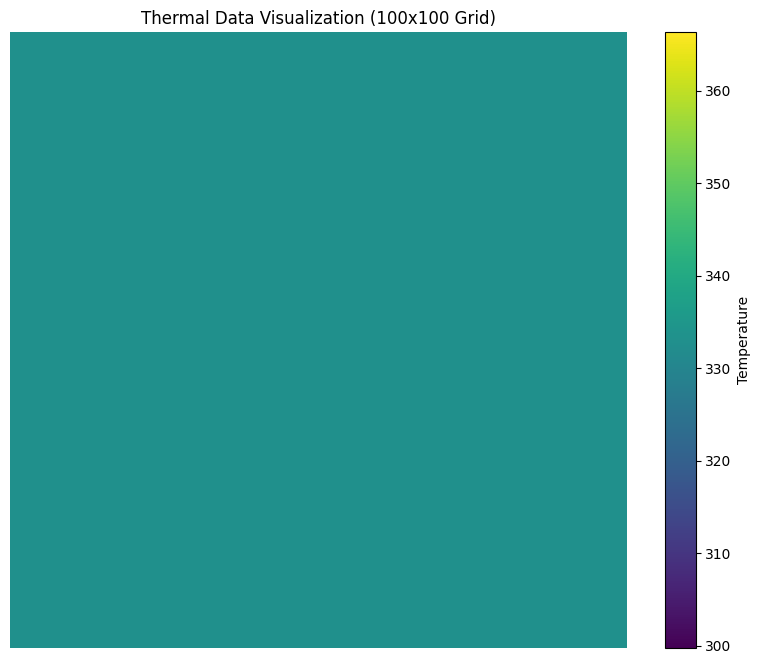

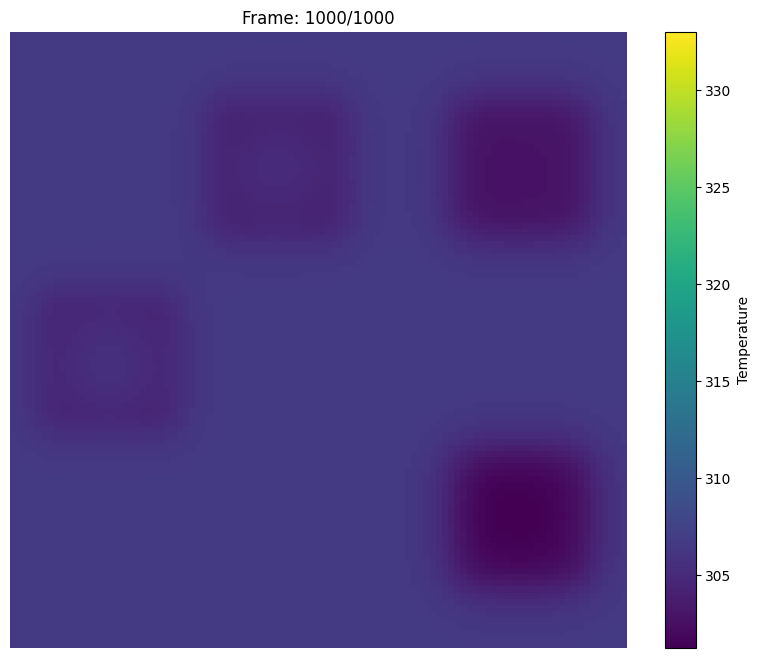

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.animation as animation

# File path - Replace this with your file path
file_path =r"C:\Users\G_Modak\Desktop\Honeywell Project\FEMap Models\FAZ_FEModel Files\Thermal analysis_temp on each nodes_different thickness inserts_cropped_100x100_please1.csv"

# Read the CSV data
data = pd.read_csv(file_path, header=None)

# Convert to numpy array
data_array = data.values

# We'll use the second row (index 1) which contains thermal data
# First row appears to be just indices 1 to 10000
thermal_data = data_array[1]

# Reshape the 10000 elements into a 100x100 grid
grid_data = thermal_data.reshape(100, 100)

# Create the visualization
plt.figure(figsize=(10, 8))

# Use viridis colormap for visualization
plt.imshow(grid_data, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Thermal Data Visualization (100x100 Grid)')
plt.axis('off')  # Hide axis numbers

# Save the figure
plt.savefig('thermal_visualization.png', dpi=300, bbox_inches='tight')

# To visualize multiple frames (if you have them)
# Uncomment and use this code if you have multiple frames

# Create animation of all frames
def create_animation():
    # Use all rows except the first one (which appears to be indices)
    frames = []
    for i in range(1, data_array.shape[0]):  # Skip first row
        frames.append(data_array[i].reshape(100, 100))
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Find global min and max for consistent color scaling
    vmin = np.min(frames)
    vmax = np.max(frames)
    
    # Initial plot
    im = ax.imshow(frames[0], cmap='viridis', animated=True, vmin=vmin, vmax=vmax)
    
    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Temperature')
    
    # Title with frame counter
    title = ax.set_title(f'Frame: 1/{len(frames)}')
    ax.axis('off')  # Hide axis numbers
    
    def update(frame_num):
        im.set_array(frames[frame_num])
        title.set_text(f'Frame: {frame_num+1}/{len(frames)}')
        return [im, title]
    
    # Create animation
    ani = animation.FuncAnimation(
        fig, update, frames=range(len(frames)), 
        blit=True, interval=1000  # 1 second between frames
    )
    
    # Save as mp4
    writer = animation.FFMpegWriter(fps=1, bitrate=5000)
    ani.save('thermal_animation.mp4', writer=writer)
    
    return ani

# If you have multiple thermal frames in your CSV, uncomment this line
create_animation()

plt.show()  # Show the static visualization